In [1]:
import numpy as np
import pandas as pd

import multiprocessing
multiprocessing.set_start_method("fork")

from scipy.stats import norm
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
# Initial parameters
mu = 13
variance = 3
T = 300
phi = 0.1

In [3]:
def simulate_ar_process(mu: float, variance: float, phi: float, T: int) -> list:
    current_val = mu
    observations = []
    observations.append(current_val)

    for _ in range(1, T):
        noise = norm.rvs(0, variance)
        current_val = mu + phi * (current_val - mu) + noise 
        observations.append(current_val)

    return observations

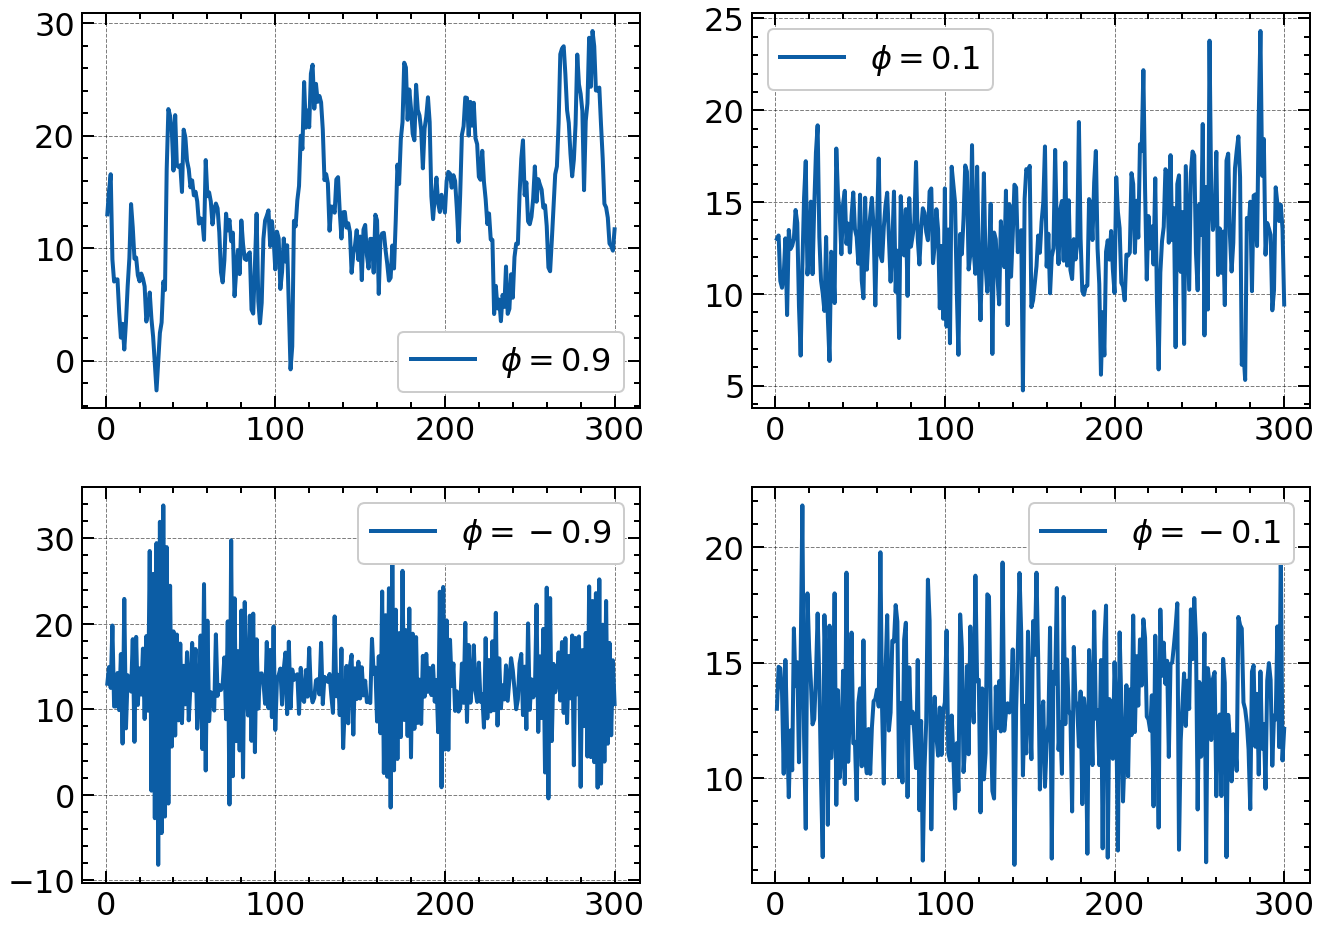

In [4]:
t = range(1, T+1)
observations1 = simulate_ar_process(mu, variance, 0.9, T)
observations2 = simulate_ar_process(mu, variance, 0.1, T)
observations3 = simulate_ar_process(mu, variance, -0.1, T)
observations4 = simulate_ar_process(mu, variance, -0.9, T)


fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(t, observations1, label='$\phi = 0.9$')
axs[0, 0].legend()
axs[0, 1].plot(t, observations2, label='$\phi = 0.1$')
axs[0, 1].legend()

axs[1, 0].plot(t, observations4, label='$\phi = -0.9$')
axs[1, 0].legend()
axs[1, 1].plot(t, observations3, label='$\phi = -0.1$')
axs[1, 1].legend()

fig.set_size_inches(11, 8)
plt.show()

In [5]:
synthetic_data_x = simulate_ar_process(mu, variance, 0.2, T)
synthetic_data_y = simulate_ar_process(mu, variance, 0.95, T)

Treating the parameters $\mu$, $\sigma^2$ and $\phi$ as random variables with prior distributions, we can make use of PyStan or PyMC3 in order to do inference. In our case we use the pystan package. 

The prior distributions of the parameters are non-informative flat priors, i.e. constants on their respective support. 

In [6]:
model = """
data {
  int<lower=0> N;
  vector[N] y;
}
parameters {
  real mu;
  real <lower=0> sigma2;
  real<lower=-1, upper=1> phi;
}
model {
  for (n in 2:N) {
    y[n] ~ normal(mu + phi * (y[n-1] - mu), sigma2);
  }
}"""

In [12]:
import stan 

#model_1_data = {"N": 301, "y": np.array(synthetic_data_x)}

# stan_model = pystan.StanModel(file='ar.stan')
#fit = pystan.stan(model_code=model, data=model_1_data, iter=1000, chains=4)

ModuleNotFoundError: No module named 'stan'

In [ ]:
model_1_data = {"N": 300, "y": np.array(synthetic_data_x)}
#stan_model.sampling(data=model_1_data, iter=50)

Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'stanfit4anon_model_d5c3d2e1910e58cacf0153e0d9110746_1214921174592423465'
Process SpawnPoolWorker-3:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Pyt

KeyboardInterrupt: 